# Unbalanced dataset treatment application

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [80]:
data_source = pd.read_csv('balance-scale .csv')
data = pd.DataFrame(data_source)

Exploring and Visualizing data

In [81]:
data.head()

,leftweight,leftdistance,rightweight,rightdistance,class
0,1,1,1,1,B
1,1,1,1,2,R
2,1,1,1,3,R
3,1,1,1,4,R
4,1,1,1,5,R


In [82]:
data.dtypes

leftweight        int64
leftdistance      int64
rightweight       int64
rightdistance     int64
class            object
dtype: object

In [83]:
data.shape

(625, 5)

In [84]:
#Rename columns
data.columns = ['lw', 'ld', 'rw', 'rd','class']

In [85]:
#Number of distinct value by column
data.nunique()

lw       5
ld       5
rw       5
rd       5
class    3
dtype: int64

In [86]:
#Checking missing value  -->  No
data.isna().sum()

lw       0
ld       0
rw       0
rd       0
class    0
dtype: int64

In [87]:
data.columns

Index(['lw', 'ld', 'rw', 'rd', 'class'], dtype='object')

In [88]:
# Set style & figures inline
sns.set()
%matplotlib inline

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text yticklabel objects>)

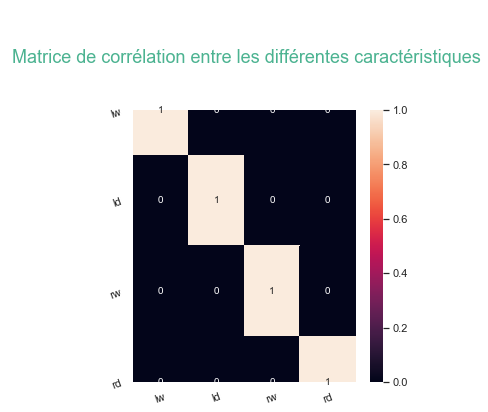

In [89]:
#Correlation Matrix
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True)
plt.title("\n\n Matrice de corrélation entre les différentes caractéristiques\n\n", fontsize=18, color='#4CB391')
plt.xticks(rotation=20)
plt.yticks(rotation=20)

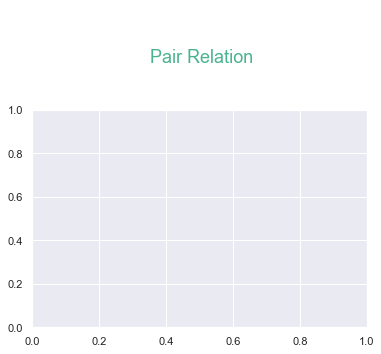

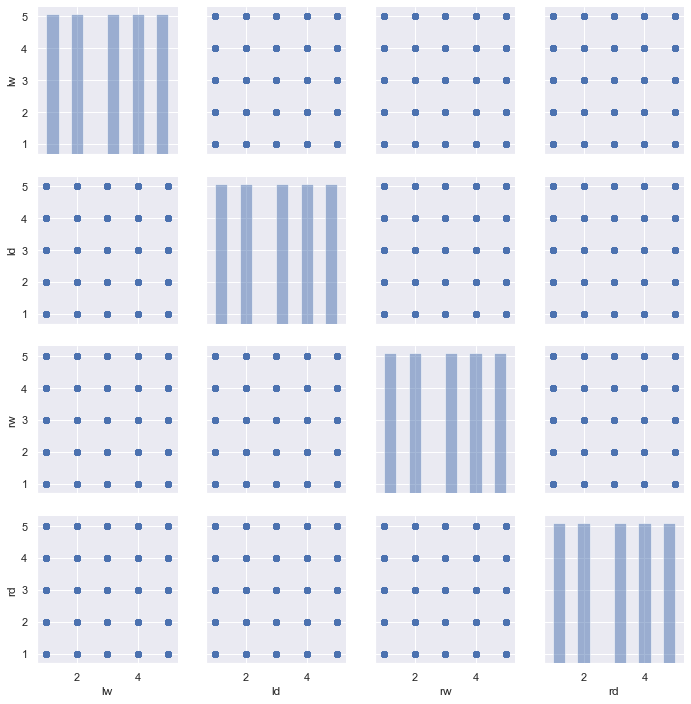

In [90]:
plt.title("\n\n Pair Relation\n\n", fontsize=18, color='#4CB391')
sns.set(style="darkgrid")
g = sns.PairGrid(data)
g.map_diag(plt.hist, alpha=.5)
g.map_offdiag(plt.scatter, alpha=.5)

Text(0.5, 1.0, '\n Répartition par classes - Histogram \n')

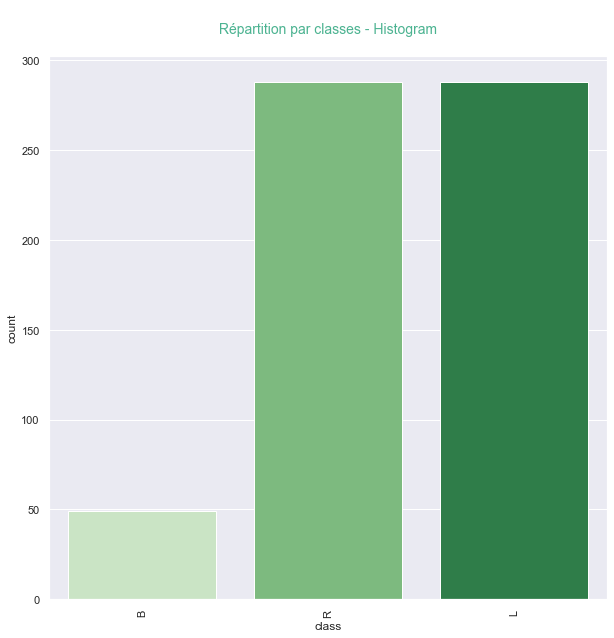

In [91]:
plt.figure(figsize=(10,10))
test2 = sns.countplot(data=data, x='class',palette="Greens")
plt.xticks(rotation= 90)
plt.title("\n Répartition par classes - Histogram \n", fontsize=14, color='#4CB391')

Text(0.5, 1.0, '\n  répartition par classes - Pie chart \n')

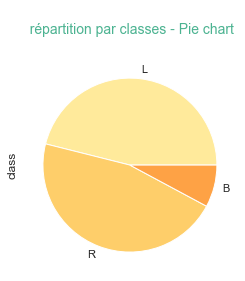

In [58]:
sns.set(palette="YlOrRd")
data['class'].value_counts().plot(kind='pie')
plt.title("\n  répartition par classes - Pie chart \n", fontsize=14, color='#4CB391')

Preparing and processing the data

In [92]:
#Removing label from data
x = pd.DataFrame(data.drop(['class'],axis=1))
#x = data.drop(['class'],axis=1)
#x = data[['lw','ld','rw','rd']]
x


,lw,ld,rw,rd
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
620,5,5,5,1
621,5,5,5,2
622,5,5,5,3
623,5,5,5,4


In [93]:
#y = pd.DataFrame(data['class'])
y = data['class']
y
#Could be encoded - LabelEncoder or OneHotEncoder

0      B
1      R
2      R
3      R
4      R
      ..
620    L
621    L
622    L
623    L
624    B
Name: class, Length: 625, dtype: object

In [94]:
#Summarize the class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({'R': 288, 'L': 288, 'B': 49})


Balancing the dataset

In [96]:
# Librairies imported to apply over sampling on minor class B
from imblearn.over_sampling import SMOTE
over = SMOTE()

x, y = over.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({'B': 288, 'R': 288, 'L': 288})


C:\Users\william.tin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [111]:
x[:,0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

[  0  26  30  52  60  78  81  90 104 120 126 130 153 156 165 182 186 208
 216 234 246 252 260 282 286 312 338 342 364 372 378 381 390 408 416 438
 442 468 494 498 504 520 534 546 564 572 594 598 624 625 626 627 628 629
 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647
 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665
 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683
 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701
 702 703 704 705 706 707 708 709 710 711 712 713 714 715 716 717 718 719
 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737
 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755
 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773
 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791
 792 793 794 795 796 797 798 799 800 801 802 803 804 805 806 807 808 809
 810 811 812 813 814 815 816 817 818 819 820 821 82

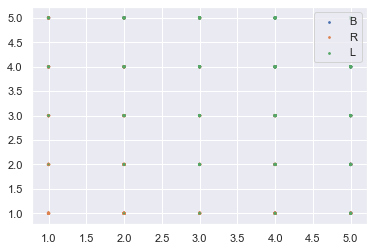

In [105]:
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    print(row_ix)
    plt.scatter(x[row_ix, 0], x[row_ix, 1],x[row_ix, 2], label=str(label))
plt.legend()
plt.show()

In [98]:
# Librairies imported to build and evaluate a decision tree model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [99]:
clf = DecisionTreeClassifier(random_state=1)
scores = cross_val_score(clf, x,y,cv=10)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.750
